<a href="https://colab.research.google.com/github/thaonguyyen/project_chd/blob/main/decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

Read in train data:

In [60]:
url = 'https://raw.githubusercontent.com/thaonguyyen/project_chd/main/cleaned_train_data.csv'
train_df = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/thaonguyyen/project_chd/main/cleaned_test_data.csv'
test_df = pd.read_csv(url)

In [61]:
def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test)) # Compute confusion matrix
    #
    # Get entries from the confusion matrix:
    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn
    #
    # Compute performance statistics:
    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
    #
    # Return a dictionary including the confusion matrix and metrics:
    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

Decision tree on training dataset:

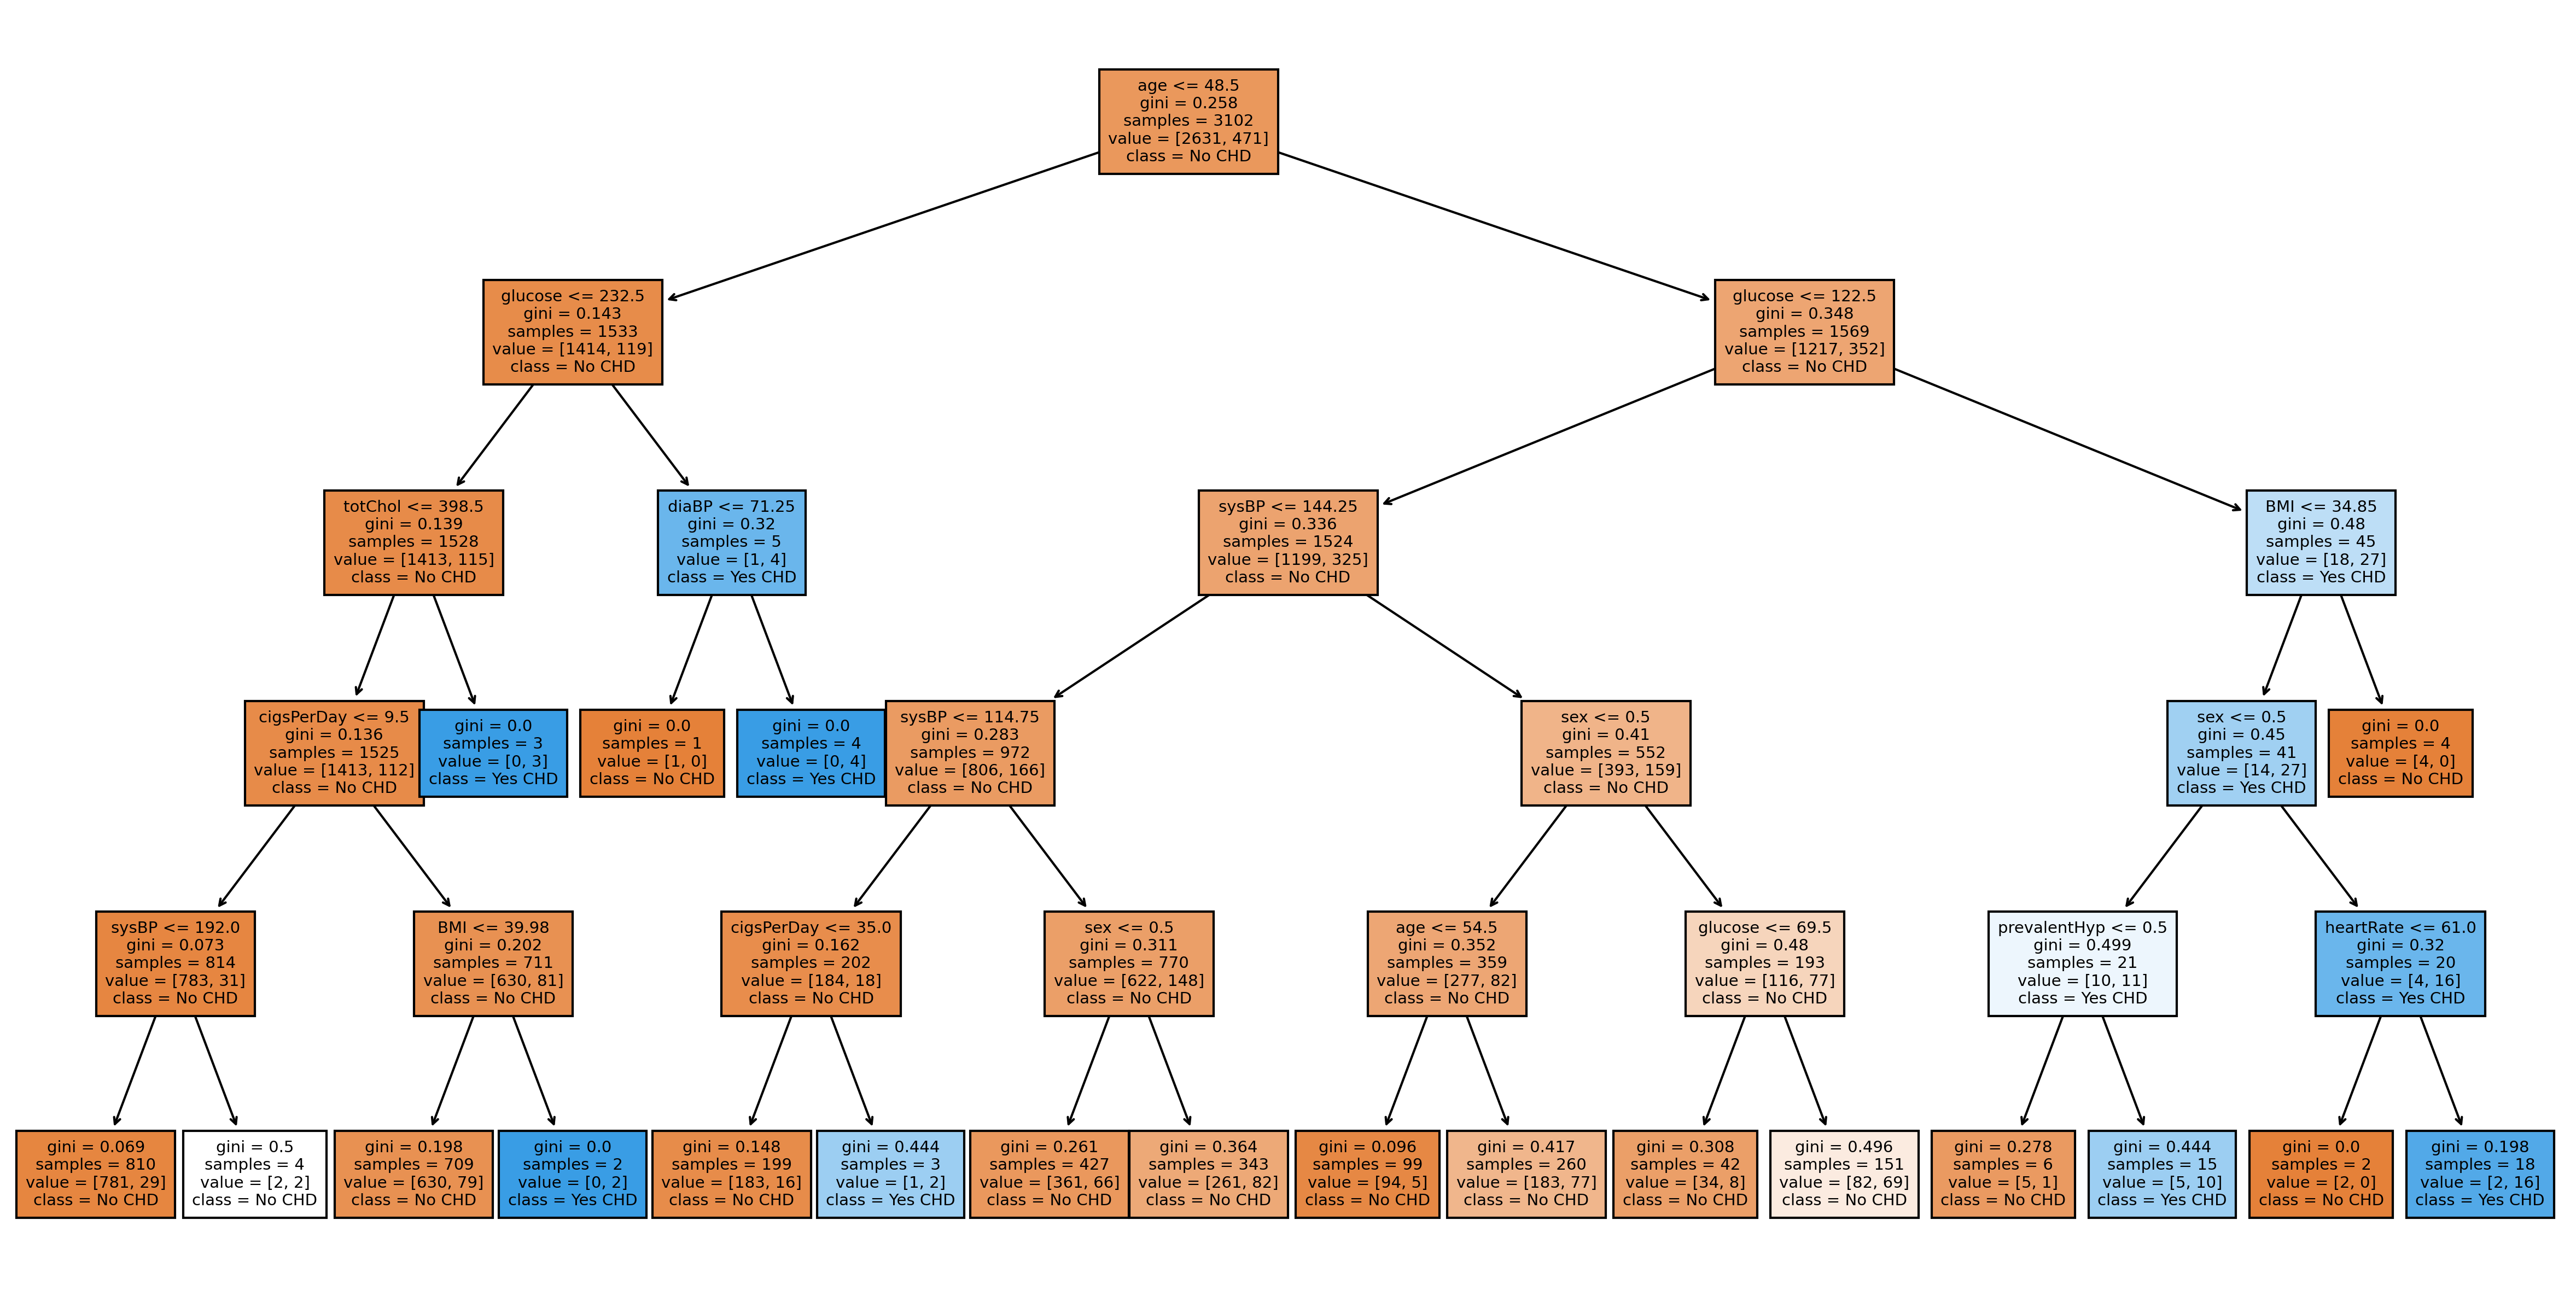

{'confusion_matrix': col_0    0    1
row_0          
0      878  143
1       11    8, 'accuracy': 0.8519230769230769, 'specificity': 0.008998875140607425, 'sensitivity': 0.9876265466816648, 'mcc': 0.10681866756819172}


In [68]:
# get training and test sets
features = ['sex', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
                   'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
                   'heartRate', 'glucose', 'education']
X_train = train_df[features]
y_train = train_df['TenYearCHD']
X_test = test_df[features]
y_test = test_df['TenYearCHD']

# plot decision tree
model = tree.DecisionTreeClassifier(max_depth=5) # fit the classifier
cart = model.fit(X_train, y_train)
plt.figure(figsize=(20,10), dpi=300)
tree.plot_tree(model, filled=True, fontsize=7, feature_names=features, class_names=['No CHD', 'Yes CHD'])
plt.show()

# make predictions on the Test Set
y_hat_cart = cart.predict(X_test)

# compute performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)

Performance comments after testing decision tree on test data:


* True negatives: correctly predicted no CHD for 878 cases
* False positives: incorrectly predicted yes CHD for 143 cases when they had no CHD
* False negatives: incorrectly predicted no CHD for 11 cases when they did have CHD
* True positives: correctly predicted yes CHD for 8 cases

* Accuracy = 85.19%
* Specificity = 0.90% (high false positive rate)
* Sensitivity = 98.76% (overall good at detecting actual CHD cases)
* Low specificity, high sensitivity = model favors yes CHD strongly
* MCC = 10.68% (overall not good at balancing errors made)

